## Problem Set 7

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.5

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


## Problem 1

One ML algorithm we didn't cover during class is the nearest neighbor algorithm. The principle behind nearest neighbors is to base your prediction for a given point on the true labels of a predefined number of training samples closest to that point in the feature space. The predicted label is some sort of average of the true labels of the nearest neighbors. The number of nearest neighbors is a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (distance-based neighbor learning). 

The challenge in this technique is the distance metric. How do you measure the distance between two points in the feature space? This is non-trivial question because usually different continuous features have different units and order of magnitudes, some features are one-hot-encoded, some features are ordinal. The key to successfully apply this method is usually to create a custom distance metric tailored to your dataset. However the standard Euclidean (geometric) distance is often used after the features are standard scaled.

Read more about this method [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) and [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression).

### Problem 1a (10 points)

In this problem, we will implement nearest neighbor regression. Read the manual of KNeighborsRegressor. Let's study how the `n_neighbors` parameter impacts the prediction.

Please recreate the toy regression dataset from the lecture notes with n_samples = 30. Split the data into train and validation (70-30). Train models with n_neighbors = 1 to 10. Plot the train and validation scores using an evaluation metric of your choice as a function of n_neighbors.

Next, visualize the models by creating more plots that display the train/val points with different colors, the true function, and the model predictions for the various n_neighbors values. Use trained models with n_neighbors = [1,3,10,30]. Do NOT use helper_functions.ipynb! Prepare the plots yourself in the notebook. You will encounter an error message. Why? How do you fix it? Explain in a paragraph!

Answer the following questions and explain your answer. 
   - What `n_neighbors` value produces a high bias (low variance) model? What `n_neighbors` value produces a high variance (low bias) model? How do overfitting and underfitting shows up in the models?
   - How does the model behave with respect to outliers?
   - Explain why the model prediction is a step function and how this step function differs from a decision tree step function!

Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point. 

In [8]:
# your code here
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(1030)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1
X_new = np.linspace(-0.5, 1.5, 2000)

[]

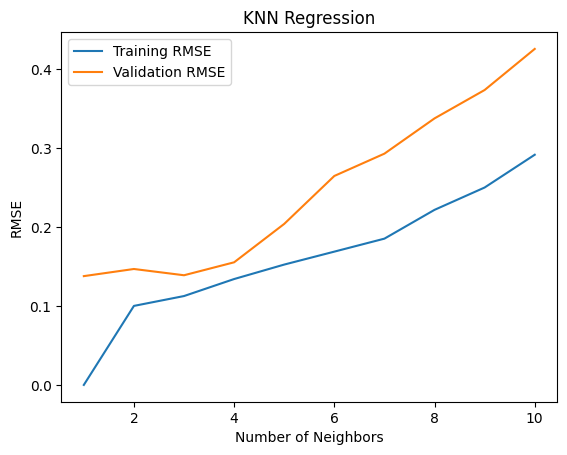

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=1030)
train_scores = []
val_scores = []
n = [1,2,3,4,5,6,7,8,9,10]
for i in n:
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train[:, np.newaxis], y_train)
    train_predict = reg.predict(X_train[:, np.newaxis])
    val_predict = reg.predict(X_val[:, np.newaxis])
    train_scores.append(np.sqrt(mean_squared_error(y_train, train_predict)))
    val_scores.append(np.sqrt(mean_squared_error(y_val, val_predict)))

plt.plot(n, train_scores, label = "Training RMSE")
plt.plot(n, val_scores, label = "Validation RMSE")
plt.xlabel("Number of Neighbors")
plt.ylabel("RMSE")
plt.title("KNN Regression")
plt.legend()
plt.plot()

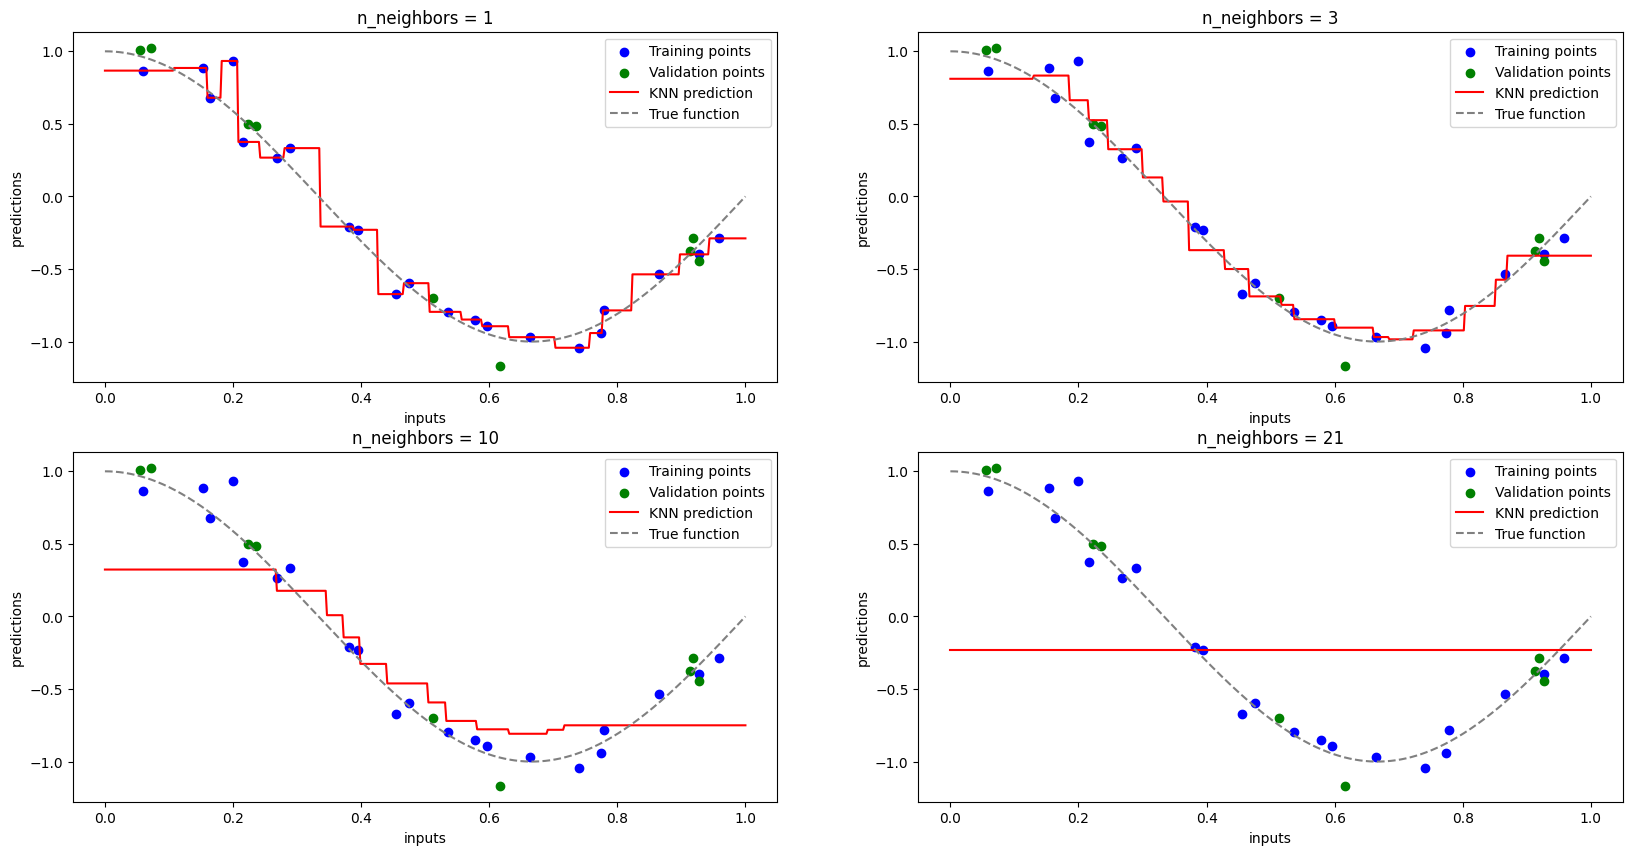

In [22]:
def plot_knn_predictions(X_train, y_train, X_val, y_val, n_neighbors_values, true_fun):
    X_full_range = np.linspace(0, 1, 500).reshape(-1, 1)

    plt.figure(figsize=(20, 10))
    
    for i, n_neighbors in enumerate(n_neighbors_values):
        n_neighbors = min(n_neighbors, len(X_train))
        model = KNeighborsRegressor(n_neighbors=n_neighbors)
        model.fit(X_train.reshape(-1, 1), y_train)
        y_pred = model.predict(X_full_range)

        plt.subplot(2, 2, i + 1)
        plt.scatter(X_train, y_train, color='blue', label='Training points')
        plt.scatter(X_val, y_val, color='green', label='Validation points')
        plt.plot(X_full_range, y_pred, color='red', label='KNN prediction')
        plt.plot(X_full_range, true_fun(X_full_range), color='gray', linestyle='dashed', label='True function')
        plt.title(f'n_neighbors = {n_neighbors}')
        plt.xlabel('inputs')
        plt.ylabel('predictions')
        plt.legend()

selected_n_neighbors = [1, 3, 10, 30]

plot_knn_predictions(X_train, y_train, X_val, y_val, selected_n_neighbors, true_fun)


##### Error with n_neighbors = 30 and Solution:
The error I encounter when using n_neighbors = 30 is due to the fact that the number of neighbors specified exceeds the number of samples in the training set. Since I have split my data into a 70-30 train-validation set, the training set has fewer than 30 samples. To fix this, one can either reduce the number of neighbors to the size of the training set or exclude n_neighbors = 30.

##### Bias-Variance Tradeoff in KNN:
High Bias (Low Variance) Model: This occurs with a high n_neighbors value. A larger number of neighbors leads to oversmoothing, where the model overly generalizes the data, resulting in underfitting. It fails to capture the complexity of the true function.
High Variance (Low Bias) Model: This happens with a low n_neighbors value, like 1. The model becomes too sensitive to the noise in the training data, capturing irregularities and fluctuations that do not represent the underlying pattern, leading to overfitting.

##### Behavior with Respect to Outliers:
The model's behavior towards outliers is heavily dependent on the n_neighbors value. With fewer neighbors (low n_neighbors), the model is more sensitive to outliers, as it relies heavily on nearby data points which might be outliers. As n_neighbors increases, the model becomes more robust to outliers, averaging over a larger number of points and thereby diluting the effect of any single outlier.

##### Step Function in KNN Predictions:
KNN predictions appear as a step function because the prediction for a given point is based on the average (or majority in classification) of the nearest neighbors. This leads to distinct flat segments or 'steps' in the prediction.

##### Other Influential Parameter:
The weights parameter in KNN is another key factor influencing predictions. It determines how much influence each neighbor has on the prediction. The two main options are 'uniform' (all neighbors have equal weight) and 'distance' (closer neighbors have more influence). Adjusting this parameter can significantly alter the model's predictions, especially in areas with sparse or unevenly distributed data. The default weight function is 'uniform', and in the below plot, we switch it to 'distance'.

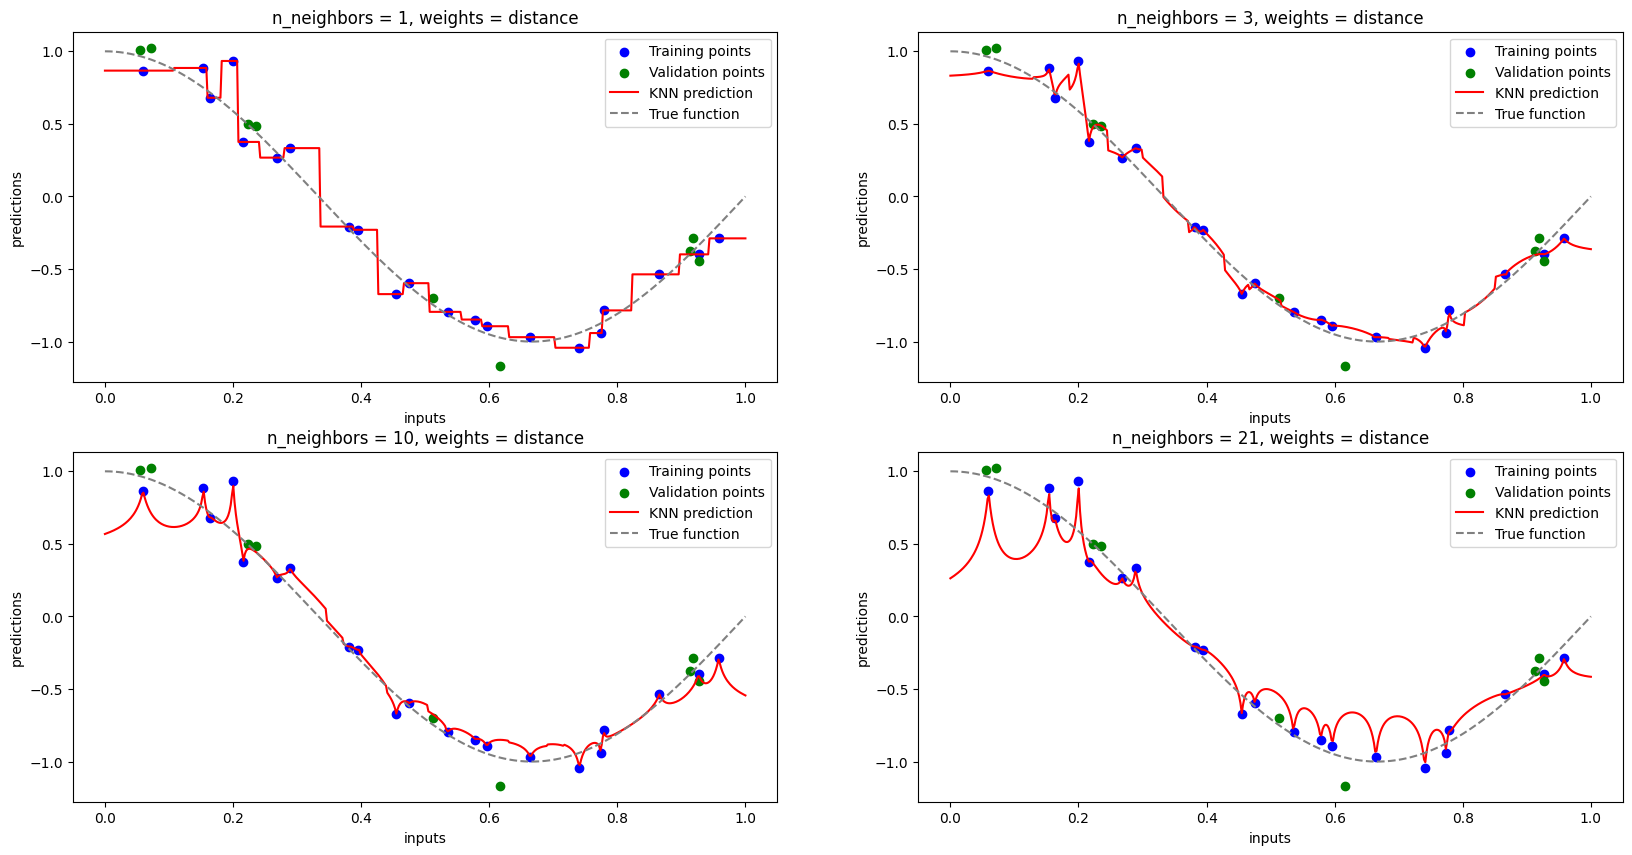

In [24]:
def plot_knn_predictions(X_train, y_train, X_val, y_val, n_neighbors_values, true_fun, weights):
    X_full_range = np.linspace(0, 1, 500).reshape(-1, 1)

    plt.figure(figsize=(20, 10))
    
    for i, n_neighbors in enumerate(n_neighbors_values):
        n_neighbors = min(n_neighbors, len(X_train))
        model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
        model.fit(X_train.reshape(-1, 1), y_train)
        y_pred = model.predict(X_full_range)

        plt.subplot(2, 2, i + 1)
        plt.scatter(X_train, y_train, color='blue', label='Training points')
        plt.scatter(X_val, y_val, color='green', label='Validation points')
        plt.plot(X_full_range, y_pred, color='red', label='KNN prediction')
        plt.plot(X_full_range, true_fun(X_full_range), color='gray', linestyle='dashed', label='True function')
        plt.title(f'n_neighbors = {n_neighbors}, weights = {weights}')
        plt.xlabel('inputs')
        plt.ylabel('predictions')
        plt.legend()

selected_n_neighbors = [1, 3, 10, 30]

plot_knn_predictions(X_train, y_train, X_val, y_val, selected_n_neighbors, true_fun, 'distance')

### Problem 1b (5 points)

Next, we'll implement the nearest neighbors algorithm for a classification problem! Please import KNeighborsClassifier and read the manual. Let's study how the `n_neighbors` parameters impact the prediction.

Please recreate the toy classification dataset from the lecture notes (makemoons). 

Prepare a plot that shows predictions for n_neighbors = 1, 10, 30, and 100. Do NOT use helper_functions.ipynb! Prepare the plots yourself in the notebook using matplotlib or seaborn (plotly is not accepted).

Explain in a paragraph when KNeighborsClassifier underfits and overfits. You can either make an argument based on the figures you prepared or you can split the dataset to train/val (70-30), train models, calculate the train and validation scores using an evaluation metric of your choice, and plot the scores. 


[[-1.9415469  -1.9415469  -1.9415469  ... -1.9415469  -1.9415469
  -1.9415469 ]
 [-1.89772031 -1.89772031 -1.89772031 ... -1.89772031 -1.89772031
  -1.89772031]
 [-1.85389373 -1.85389373 -1.85389373 ... -1.85389373 -1.85389373
  -1.85389373]
 ...
 [ 2.30963204  2.30963204  2.30963204 ...  2.30963204  2.30963204
   2.30963204]
 [ 2.35345863  2.35345863  2.35345863 ...  2.35345863  2.35345863
   2.35345863]
 [ 2.39728522  2.39728522  2.39728522 ...  2.39728522  2.39728522
   2.39728522]]


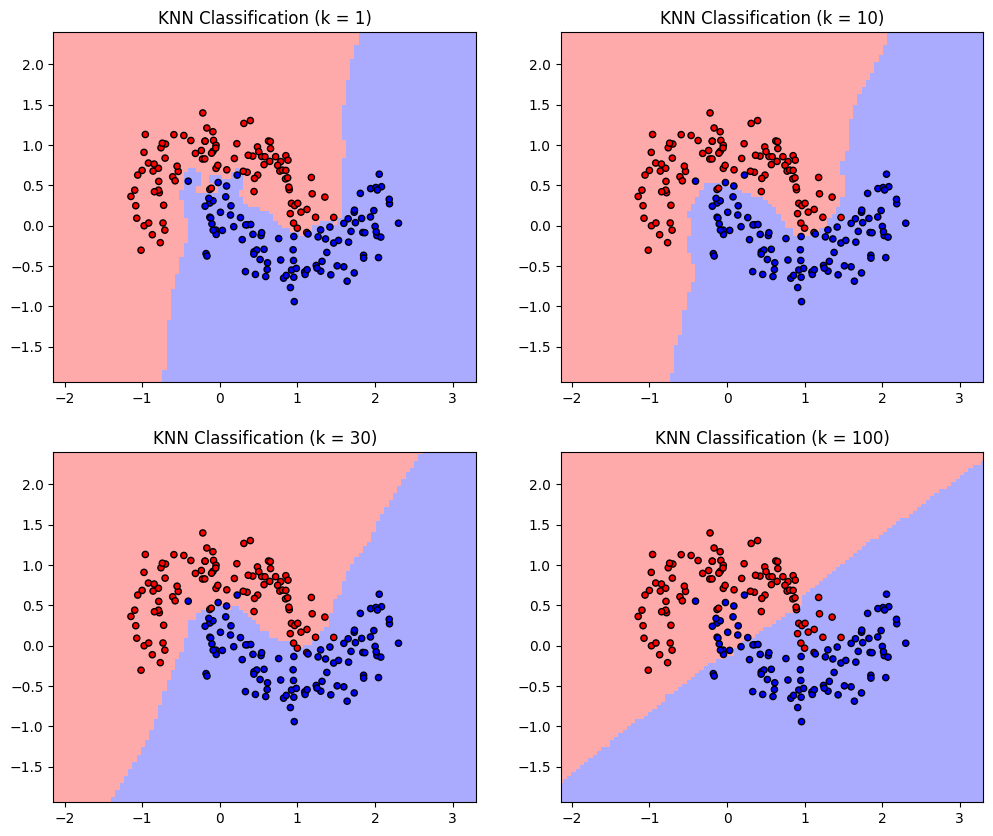

In [38]:
# your code here 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

X,y = make_moons(noise=0.2, random_state=1,n_samples=200)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# print(X.shape) # (200, 2)
# print(y.shape) # (200,)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
# print(xx.shape) # (100, 100) # every row is the same
# print(yy.shape) # (100, 100) # every column is the same 

print(yy)
n_neighbors_values = [1, 10, 30, 100]
plt.figure(figsize=(12, 10))

for i, n_neighbors in enumerate(n_neighbors_values):
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)

    # np.c_: numpy.column_stack
    # .ravel(): convert two-dimensional arrays into one-dimensional arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    # print(np.c_[xx.ravel(), yy.ravel()].shape) # (10000, 2)
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"KNN Classification (k = {n_neighbors})")

The KNeighborsClassifier can underfit or overfit depending on the chosen value of n_neighbors. Underfitting occurs when n_neighbors is set too high. In this scenario, the model oversimplifies the problem, ignoring subtle but important patterns in the data. This results in a model that performs poorly not just on new data but also on the training data, as it generalizes too much and fails to capture the complexities of the underlying relationships. On the other hand, overfitting happens when n_neighbors is too low. Here, the model becomes overly sensitive to the noise in the training data. It starts to interpret random fluctuations as significant, leading to a complex model that performs well on the training data but poorly on new, unseen data. This is because it captures local patterns in the training data that don't generalize well. As n_neighbors decreases, the model complexity increases, often improving training performance but at the cost of validation performance, indicating overfitting. Conversely, a large n_neighbors value leads to a too-simple model, decreasing performance on both training and validation sets, indicating underfitting.

## Problem 2

Let's play around with more algorithms! In this problem, you will work with the diabetes dataset and try different ML algorithms to figure out which one is the best. Whenever you work with a new dataset, you want to try as many algorithms on it as possible because you can't know in advance which algorithm (and hyperparameters) will be the best.

Generally you need to decide five things when you build an ML pipeline:
- your splitting strategy
- how to preprocess the data
- what evaluation metric you'll use
- what ML algorithms you will try
- what paramater grid you should use for each ML algorithm

You'll write a function in problem 2a that takes a preprocessor, an ML algorithm, and its corresponding parameter grid as inputs and it will calculate test scores and return the best models. The splitting strategy and the evaluation metric are not inputs to this function but predefined.

### Problem 2a (15 points)

Write a function which takes the unprocessed feature matrix, target variable, a preprocessor (ColumnTransformer), an initialized ML algorithm, and a correspondig parameter grid as inputs. Do the following inside the function:
 1. split the data to other and test (80-20) and then use KFold with 4 folds
 2. preprocess the data and perform cross validation (I recommend you use GridSearchCV)
 3. Finally, calculate the test score. Use RMSE as your evaluation metric. 
 
 Repeat this 10 times for 10 different random states, and the function should return the 10 best models and the 10 test scores. The skeleton of the function is provided for convenince.

The function name contains the splitting strategy and the evaluation metric (i.e., `MLpipe_KFold_RMSE`). It would be difficult (but not impossible) to write a general `MLpipe` function that takes a splitter and an evaluation metric also as inputs for two reasons:
- some splitters are difficult to pass as a function argument (e.g., two train_test_split steps, or a train_test_split combined with a KFold),
- some evaluation metrics need to be maximized (like accuracy, R2, f_beta), while others need to be minimized (like logloss, RMSE) and the code for these two options differ.

For now, I recommend that if you need to try multiple ML algorithms, write a function that's specific to a splitting strategy and an evaluation metric and add a description to the function as shown in MLpipe_KFold_RMSE. Such functions make it very easy to try many ML algorithms on your dataset and I recommend you write a similar function for your project.

Add plenty of test and print statements to make sure your code works correctly and it does what you expect it to do. You are encouraged to: print the sets and their shapes before and after preprocessing, print the GridSearchCV results, print the test scores.

Test the function with linear regression models that use l1 regularization. Fix any warnings you might encounter. Print out the mean and the standard deviation of the test scores.

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

In [45]:
# read in the dataset as a dataframe
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')

# create target series and feature matrix 
y = df['Y']
X = df.loc[:, df.columns != 'Y']

# function for the ML pipeline as outlined above 
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.

    You should:

    1. Loop through 10 different random states
    2. Split your data 
    3. Fit a model using GridSearchCV with KFold and the predefined Preprocessor 
    4. Calculate the model's error on the test set 
    5. Return a list of 10 test scores and 10 best models 
    '''
    
    # lists to be returned 
    test_scores = []
    best_models = []

    # your code here...

    for random_state in range(10):
        
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('ML_algo', ML_algo)])
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=kf, scoring=make_scorer(rmse, greater_is_better=False), return_train_score=True)
        grid.fit(X_other, y_other)

        best_models.append(grid.best_estimator_)
        y_test_pred = grid.predict(X_test)
        test_score = mean_squared_error(y_test, y_test_pred, squared=False) 
        test_scores.append(test_score)

        print(f"Random State: {random_state}, Best Model: {grid.best_params_}, Test RMSE: {test_score}")

    return test_scores, best_models

In [46]:
print(X.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80


In [64]:
# test your function with a linear regression model (l1 regularization)
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), X.columns)
])

ML_algo = Lasso()

param_grid = {'ML_algo__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'ML_algo__max_iter': [1000000]}

test_scores, best_models = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)

print("Mean of Test RMSEs on Lasso:", np.mean(test_scores))
print("Standard Deviation of Test RMSEs on Lasso:", np.std(test_scores))

Random State: 0, Best Model: {'ML_algo__alpha': 1, 'ML_algo__max_iter': 1000000}, Test RMSE: 58.418012578099614
Random State: 1, Best Model: {'ML_algo__alpha': 1, 'ML_algo__max_iter': 1000000}, Test RMSE: 55.004201250295736
Random State: 2, Best Model: {'ML_algo__alpha': 1, 'ML_algo__max_iter': 1000000}, Test RMSE: 55.70260015326153
Random State: 3, Best Model: {'ML_algo__alpha': 1, 'ML_algo__max_iter': 1000000}, Test RMSE: 55.84798984702266
Random State: 4, Best Model: {'ML_algo__alpha': 0.1, 'ML_algo__max_iter': 1000000}, Test RMSE: 53.98289994174258
Random State: 5, Best Model: {'ML_algo__alpha': 1e-05, 'ML_algo__max_iter': 1000000}, Test RMSE: 54.60390794532578
Random State: 6, Best Model: {'ML_algo__alpha': 0.1, 'ML_algo__max_iter': 1000000}, Test RMSE: 54.01186729665979
Random State: 7, Best Model: {'ML_algo__alpha': 1e-05, 'ML_algo__max_iter': 1000000}, Test RMSE: 54.461425798553584
Random State: 8, Best Model: {'ML_algo__alpha': 1, 'ML_algo__max_iter': 1000000}, Test RMSE: 53.1

### Problem 2b (15 points)

Next, train the following models on the diabetes dataset:
- linear regression with l1 regularization (already completed in 2a)
- linear regression with l2 regularization 
- linear regression with an elastic net 
- RF
- SVR
- k nearest neighbor regression

Please determine what the parameter grid should be for each of these methods. Follow the guidance we discussed during the lecture.

Make sure your code is reproducable! When you rerun it, you should get back the exact same test scores and best hyperparameters in each run. So fix your random states where ever necessary.

Which algorithm is the best on the diabetes dataset based on the mean and standard deviation of the test scores? Write a paragraph or two and describe your findings. 

In [65]:
# your code here
from sklearn.linear_model import Ridge
ML_algo = Ridge()
param_grid = {'ML_algo__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'ML_algo__max_iter': [1000000]}
test_scores2, best_models2 = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print("Mean of Test RMSEs on Ridge:", np.mean(test_scores2))
print("Standard Deviation of Test RMSEs on Ridge:", np.std(test_scores2))

Random State: 0, Best Model: {'ML_algo__alpha': 10, 'ML_algo__max_iter': 1000000}, Test RMSE: 58.55968091090907
Random State: 1, Best Model: {'ML_algo__alpha': 10, 'ML_algo__max_iter': 1000000}, Test RMSE: 55.02012541901423
Random State: 2, Best Model: {'ML_algo__alpha': 10, 'ML_algo__max_iter': 1000000}, Test RMSE: 55.32994564041653
Random State: 3, Best Model: {'ML_algo__alpha': 10, 'ML_algo__max_iter': 1000000}, Test RMSE: 56.119935944805874
Random State: 4, Best Model: {'ML_algo__alpha': 10, 'ML_algo__max_iter': 1000000}, Test RMSE: 53.86565490491644
Random State: 5, Best Model: {'ML_algo__alpha': 1e-05, 'ML_algo__max_iter': 1000000}, Test RMSE: 54.60391269208345
Random State: 6, Best Model: {'ML_algo__alpha': 0.1, 'ML_algo__max_iter': 1000000}, Test RMSE: 54.35974633831972
Random State: 7, Best Model: {'ML_algo__alpha': 0.1, 'ML_algo__max_iter': 1000000}, Test RMSE: 54.442326548095956
Random State: 8, Best Model: {'ML_algo__alpha': 10, 'ML_algo__max_iter': 1000000}, Test RMSE: 53.

In [66]:
from sklearn.linear_model import ElasticNet
ML_algo = ElasticNet()
param_grid = {'ML_algo__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'ML_algo__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'ML_algo__max_iter': [1000000]}
test_scores3, best_models3 = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print("Mean of Test RMSEs on ElasticNet:", np.mean(test_scores3))
print("Standard Deviation of Test RMSEs on ElasticNet:", np.std(test_scores3))

Random State: 0, Best Model: {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.1, 'ML_algo__max_iter': 1000000}, Test RMSE: 58.2147597385062
Random State: 1, Best Model: {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.1, 'ML_algo__max_iter': 1000000}, Test RMSE: 55.003328268369316
Random State: 2, Best Model: {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.3, 'ML_algo__max_iter': 1000000}, Test RMSE: 55.16049486508842
Random State: 3, Best Model: {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.5, 'ML_algo__max_iter': 1000000}, Test RMSE: 56.107775496677014
Random State: 4, Best Model: {'ML_algo__alpha': 0.1, 'ML_algo__l1_ratio': 0.1, 'ML_algo__max_iter': 1000000}, Test RMSE: 53.80264534302331
Random State: 5, Best Model: {'ML_algo__alpha': 1e-05, 'ML_algo__l1_ratio': 0.9, 'ML_algo__max_iter': 1000000}, Test RMSE: 54.60390100209882
Random State: 6, Best Model: {'ML_algo__alpha': 0.01, 'ML_algo__l1_ratio': 0.9, 'ML_algo__max_iter': 1000000}, Test RMSE: 54.240208993171755
Random State: 7, Best 

In [61]:
from sklearn.ensemble import RandomForestRegressor
ML_algo = RandomForestRegressor()
param_grid = {'ML_algo__max_depth': [1,2,3,5,10,25,50,75,100],
              'ML_algo__max_features': [1,2,3,5,10]}
test_scores4, best_models4 = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print("Mean of Test RMSEs on Random Forest:", np.mean(test_scores4))
print("Standard Deviation of Test RMSEs on Random Forest:", np.std(test_scores4))

Random State: 0, Best Model: {'ML_algo__max_depth': 10, 'ML_algo__max_features': 3}, Test RMSE: 60.45450657519762
Random State: 1, Best Model: {'ML_algo__max_depth': 75, 'ML_algo__max_features': 2}, Test RMSE: 57.9405458740231
Random State: 2, Best Model: {'ML_algo__max_depth': 10, 'ML_algo__max_features': 3}, Test RMSE: 57.55240965945729
Random State: 3, Best Model: {'ML_algo__max_depth': 100, 'ML_algo__max_features': 5}, Test RMSE: 57.50800428899763
Random State: 4, Best Model: {'ML_algo__max_depth': 25, 'ML_algo__max_features': 2}, Test RMSE: 56.573080101182676
Random State: 5, Best Model: {'ML_algo__max_depth': 3, 'ML_algo__max_features': 5}, Test RMSE: 55.39507294697313
Random State: 6, Best Model: {'ML_algo__max_depth': 50, 'ML_algo__max_features': 3}, Test RMSE: 59.41447811865691
Random State: 7, Best Model: {'ML_algo__max_depth': 75, 'ML_algo__max_features': 3}, Test RMSE: 53.11489091656549
Random State: 8, Best Model: {'ML_algo__max_depth': 10, 'ML_algo__max_features': 3}, Tes

In [69]:
from sklearn.svm import SVR
ML_algo = SVR()
param_grid = {'ML_algo__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'ML_algo__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
test_scores5, best_models5 = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print("Mean of Test RMSEs on SVR:", np.mean(test_scores5))
print("Standard Deviation of Test RMSEs on SVR:", np.std(test_scores5))

Random State: 0, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}, Test RMSE: 57.94610625334704
Random State: 1, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}, Test RMSE: 54.92996559968491
Random State: 2, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}, Test RMSE: 54.77321576314008
Random State: 3, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}, Test RMSE: 55.10025696164037
Random State: 4, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}, Test RMSE: 55.84658132888023
Random State: 5, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}, Test RMSE: 54.84612179528863
Random State: 6, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}, Test RMSE: 54.27948057181297
Random State: 7, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}, Test RMSE: 54.23191510042647
Random State: 8, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}, Test RMSE: 54.122670743978865
Random State: 9, Best Model: {'ML_algo__C': 100, 'ML_algo__gamma': 0.01}

In [67]:
from sklearn.neighbors import KNeighborsRegressor
ML_algo = KNeighborsRegressor()
param_grid = {'ML_algo__n_neighbors': [1,2,3,5,10,25,50,100],
              'ML_algo__weights': ['uniform', 'distance']}
test_scores6, best_models6 = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print("Mean of Test RMSEs on KNN:", np.mean(test_scores6))
print("Standard Deviation of Test RMSEs on KNN:", np.std(test_scores6))

Random State: 0, Best Model: {'ML_algo__n_neighbors': 10, 'ML_algo__weights': 'distance'}, Test RMSE: 61.61160000773894
Random State: 1, Best Model: {'ML_algo__n_neighbors': 25, 'ML_algo__weights': 'distance'}, Test RMSE: 57.70615038283746
Random State: 2, Best Model: {'ML_algo__n_neighbors': 50, 'ML_algo__weights': 'distance'}, Test RMSE: 58.37023561486848
Random State: 3, Best Model: {'ML_algo__n_neighbors': 25, 'ML_algo__weights': 'distance'}, Test RMSE: 59.66020878151864
Random State: 4, Best Model: {'ML_algo__n_neighbors': 25, 'ML_algo__weights': 'distance'}, Test RMSE: 57.04002320793262
Random State: 5, Best Model: {'ML_algo__n_neighbors': 25, 'ML_algo__weights': 'distance'}, Test RMSE: 56.38029451632025
Random State: 6, Best Model: {'ML_algo__n_neighbors': 10, 'ML_algo__weights': 'distance'}, Test RMSE: 61.241078167786526
Random State: 7, Best Model: {'ML_algo__n_neighbors': 10, 'ML_algo__weights': 'distance'}, Test RMSE: 58.052874032788644
Random State: 8, Best Model: {'ML_algo

In [68]:
print("Mean of Test RMSEs on Lasso:", np.mean(test_scores))
print("Standard Deviation of Test RMSEs on Lasso:", np.std(test_scores))
print("Mean of Test RMSEs on Ridge:", np.mean(test_scores2))
print("Standard Deviation of Test RMSEs on Ridge:", np.std(test_scores2))
print("Mean of Test RMSEs on ElasticNet:", np.mean(test_scores3))
print("Standard Deviation of Test RMSEs on ElasticNet:", np.std(test_scores3))
print("Mean of Test RMSEs on Random Forest:", np.mean(test_scores4))
print("Standard Deviation of Test RMSEs on Random Forest:", np.std(test_scores4))
print("Mean of Test RMSEs on SVR:", np.mean(test_scores5))
print("Standard Deviation of Test RMSEs on SVR:", np.std(test_scores5))
print("Mean of Test RMSEs on KNN:", np.mean(test_scores6))
print("Standard Deviation of Test RMSEs on KNN:", np.std(test_scores6))

Mean of Test RMSEs on Lasso: 54.212034717581915
Standard Deviation of Test RMSEs on Lasso: 2.794205636038054
Mean of Test RMSEs on Ridge: 54.293113314986364
Standard Deviation of Test RMSEs on Ridge: 2.8045871480902997
Mean of Test RMSEs on ElasticNet: 54.22775436997209
Standard Deviation of Test RMSEs on ElasticNet: 2.682170570857667
Mean of Test RMSEs on Random Forest: 56.454877630348435
Standard Deviation of Test RMSEs on Random Forest: 2.7833582120068585
Mean of Test RMSEs on SVR: 54.29459899608334
Standard Deviation of Test RMSEs on SVR: 2.6924223720171097
Mean of Test RMSEs on KNN: 57.592641707662764
Standard Deviation of Test RMSEs on KNN: 3.239736855043693


**your explanation here**
ElasticNet emerges as the top-performing model with a relatively low test RMSE of 54.23, coupled with the lowest standard deviation of 2.68, indicating both strong and consistent performance. In contrast, KNN lags behind as the least effective model, evidenced by the highest RMSE of 57.6 and the greatest standard deviation of 3.24, suggesting poorer and less reliable predictions. Lasso, Ridge, and SVR exhibit comparable performances, as indicated by their closely aligned RMSEs and standard deviations. Meanwhile, Random Forest Regression does not fare as well, with an RMSE of 56.45 and a standard deviation of 2.78, positioning it behind the top contenders like ElasticNet.